In [146]:
import pandas as pd
import numpy as np
import itertools


N = 10000
T = 2

df = pd.DataFrame([{'i': i, 't': t} for i, t in itertools.product(range(N), range(T))])

x_star = np.random.binomial(1, p=0.5, size=N)
x_it = np.vstack([x_star]*T).T


In [147]:
y0_i0 = np.random.normal(size=(N,))
y1_i0 = np.random.normal(size=(N,)) + 1

y_i0 = (1-x_star) * y0_i0 + x_star * y1_i0

y0_i1 = np.random.normal(size=(N,)) + y_i0 
y1_i1 = np.random.normal(size=(N,)) + y_i0 + 2


y0_it = np.vstack([y0_i0, y0_i1]).T

y1_it = np.vstack([y1_i0, y1_i1]).T
y0_it.shape, y1_it.shape

((10000, 2), (10000, 2))

In [148]:
y_it = (1-x_it) * y0_it + x_it * y1_it


df['Y_it'] = df.apply(lambda row: y_it[row['i'], row['t']], axis=1)
df['X_it'] = df[['i','t']].apply(lambda row: x_it[row['i'], row['t']], axis=1)
df['X*'] = df[['i','t']].apply(lambda row: x_star[row['i']], axis=1)

In [149]:
df.head(4)

,i,t,Y_it,X_it,X*
0,0,0,0.893903,1,1
1,0,1,2.868974,1,1
2,1,0,1.019704,0,0
3,1,1,-0.208727,0,0


In [150]:
delta = df.groupby(['t', 'X_it']).mean()['Y_it'][:,1] - df.groupby(['t', 'X_it']).mean()['Y_it'][:,0]

<AxesSubplot:xlabel='t'>

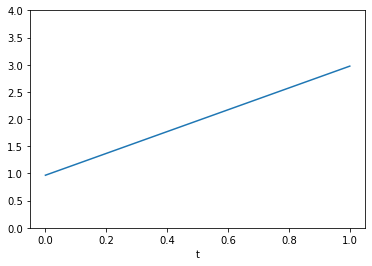

In [151]:
delta.plot(ylim=(0, 4))

In [152]:
delta = df.groupby(['t', 'X*']).mean()['Y_it'][:,1] - df.groupby(['t', 'X*']).mean()['Y_it'][:,0]

<AxesSubplot:xlabel='t'>

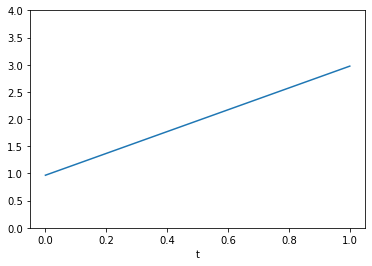

In [153]:
delta.plot(ylim=(0,4))

In [118]:
delta

t
0    0.957193
1    2.954766
Name: Y_it, dtype: float64

In [154]:
pivoted = df.pivot(index='i', columns='t', values=['Y_it', 'X_it'])
pivoted.head()

Y_it           X_it     
t         0         1    0    1
i                              
0  0.893903  2.868974  1.0  1.0
1  1.019704 -0.208727  0.0  0.0
2  0.152229 -0.834458  0.0  0.0
3  1.708547  1.832947  0.0  0.0
4 -1.797252 -1.709183  0.0  0.0

In [155]:
pivoted = pd.DataFrame(pivoted.to_records())
pivoted

,i,"('Y_it', 0)","('Y_it', 1)","('X_it', 0)","('X_it', 1)"
0,0,0.893903,2.868974,1.0,1.0
1,1,1.019704,-0.208727,0.0,0.0
2,2,0.152229,-0.834458,0.0,0.0
3,3,1.708547,1.832947,0.0,0.0
4,4,-1.797252,-1.709183,0.0,0.0
...,...,...,...,...,...
9995,9995,1.147063,0.064503,0.0,0.0
9996,9996,1.183903,3.549020,0.0,0.0
9997,9997,1.752738,0.090239,0.0,0.0
9998,9998,0.323749,2.769528,1.0,1.0


In [156]:
pivoted.columns

Index(['i', '('Y_it', 0)', '('Y_it', 1)', '('X_it', 0)', '('X_it', 1)'], dtype='object')

In [160]:
from statsmodels.api import OLS


pivoted['intercept'] = 1

model = OLS(exog=pivoted[["('X_it', 1)", "('Y_it', 0)", "intercept"]],
            endog=pivoted["('Y_it', 1)"])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ('Y_it', 1)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                 1.624e+04
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:01:20   Log-Likelihood:                -14145.
No. Observations:               10000   AIC:                         2.830e+04
Df Residuals:                    9997   BIC:                         2.832e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
('X_it', 1)     2.0107      0.022     91.040      0.000       1.967       2.054
('Y_it', 0)     0.9961      0.010    100.897      0.000       0.977       1.015
intercept       0.0079      0.014      0.558      0.577      -0.020       0.036
==============================================================================
Omnibus:                        0.654   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.621
Skew:                           0.015   Prob(JB):                        0.733
Kurtosis:                       3.025   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
from statsmodels.api import OLS


pivoted['intercept'] = 1

model = OLS(exog=pivoted[["('X_it', 1)", "intercept"]],
            endog=pivoted["('Y_it', 1)"])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ('Y_it', 1)   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 1.105e+04
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:00:12   Log-Likelihood:                -17656.
No. Observations:               10000   AIC:                         3.532e+04
Df Residuals:                    9998   BIC:                         3.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
('X_it', 1)     2.9741      0.028    105.125      0.000       2.919       3.030
intercept       0.0262      0.020      1.305      0.192      -0.013       0.066
==============================================================================
Omnibus:                        1.641   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.610
Skew:                           0.029   Prob(JB):                        0.447
Kurtosis:                       3.021   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""